In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


target variables:\
margin, bottles sold, profit\
item description:\
american imported and falvoured

grouping\
sales(high mid low)\
category, year -> sales\
sailor, year\
item

clean the dataset
group by year store,item name+item number(sku)




# Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from prophet import Prophet
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Reading the files

In [ ]:
#zip_file_path = '/content/drive/MyDrive/IE/Retail/Iowa_Liquor_Sales_DEC2023.csv.zip'
#csv_file_name = 'Iowa_Liquor_Sales_DEC2023.csv'

#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    #zip_ref.extractall('/content/temp_data')

#df = pd.read_csv(f'/content/temp_data/{csv_file_name}')

#df['Date'] = pd.to_datetime(df['Date'])

#df_filtered = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2023-12-31')]

#output_file_path = '/content/drive/MyDrive/IE/Retail/Iowa_Liquor_Sales_2020_2023.parquet'
#df_filtered.to_parquet(output_file_path)


<ipython-input-5-7ab03f972358>:7: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'/content/temp_data/{csv_file_name}')


In [ ]:
data = pd.read_parquet('/content/drive/MyDrive/IE/Retail/Iowa_Liquor_Sales_2020_2023.parquet')

In [ ]:
data[data['Item Number']==35416].head(1)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
17735288,INV-24308800088,2020-01-02,2601,HY-VEE FOOD STORE / FAIRFIELD,1300 WEST BURLINGTON AVE,FAIRFIELD,52556.0,POINT (-91.978702 41.006456),51.0,JEFFERSON,1031100.0,AMERICAN VODKAS,259.0,HEAVEN HILL BRANDS,35416,BURNETTS VODKA 80PRF,12,750,4.5,6.75,6,40.5,4.5,1.18


In [ ]:
data[data['Item Number']==35418].head(1)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
17735865,INV-24293600038,2020-01-02,2620,HY-VEE / WINDSOR HEIGHTS,7101 UNIVERSITY AVE,WINDSOR HEIGHTS,50311.0,None,77.0,POLK,1031100.0,AMERICAN VODKAS,259.0,HEAVEN HILL BRANDS,35418,BURNETTS VODKA 80PRF,6,1750,9.49,14.24,6,85.44,10.5,2.77


In [ ]:
data[data['Item Number']==41670].head(1)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
17741499,INV-24295800023,2020-01-02,2605,HY-VEE DRUGSTORE #5 / CEDAR RAPIDS,2001 BLAIRS FERRY ROAD NE,CEDAR RAPIDS,52402.0,POINT (-91.668909 42.034799),57.0,LINN,1031200.0,AMERICAN FLAVORED VODKA,259.0,HEAVEN HILL BRANDS,41670,BURNETTS BLUE RASPBERRY,12,750,4.5,6.75,12,81.0,9.0,2.37


In [ ]:
data.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
17735173,INV-24305900070,2020-01-02,2191,KEOKUK SPIRITS,1013 MAIN,KEOKUK,52632.0,POINT (-91.387797 40.400038),56.0,LEE,1081300.0,AMERICAN CORDIALS & LIQUEURS,259.0,HEAVEN HILL BRANDS,76478,PAMA POMEGRANATE LIQUEUR,6,750,9.99,14.99,6,89.94,4.50,1.18
17735174,INV-24299500025,2020-01-02,3842,BANCROFT LIQUOR STORE,107 N PORTLAND ST PO BX 222,BANCROFT,50517.0,POINT (-94.218 43.29355),55.0,KOSSUTH,1032200.0,IMPORTED FLAVORED VODKA,260.0,DIAGEO AMERICAS,64755,CIROC RED BERRY,12,750,16.49,24.74,1,24.74,0.75,0.19
17735175,INV-24295800079,2020-01-02,2605,HY-VEE DRUGSTORE #5 / CEDAR RAPIDS,2001 BLAIRS FERRY ROAD NE,CEDAR RAPIDS,52402.0,POINT (-91.668909 42.034799),57.0,LINN,1012100.0,CANADIAN WHISKIES,259.0,HEAVEN HILL BRANDS,11773,BLACK VELVET,48,200,1.56,2.34,8,18.72,1.60,0.42
17735176,INV-24302300022,2020-01-02,5259,GAMEDAY LIQUOR,924 LOCUST ST,GLENWOOD,51534.0,POINT (-95.916235 41.284951),65.0,MILLS,1032200.0,IMPORTED FLAVORED VODKA,370.0,PERNOD RICARD USA,34030,ABSOLUT CITRON,12,750,9.99,14.99,1,14.99,0.75,0.19
17735177,INV-24294900206,2020-01-02,2647,HY-VEE #7 / CEDAR RAPIDS,5050 EDGEWOOD RD,CEDAR RAPIDS,52411.0,POINT (-91.701581 42.030129),57.0,LINN,1011100.0,BLENDED WHISKIES,255.0,INFINIUM SPIRITS,87026,SKREWBALL PEANUT BUTTER WHISKEY,6,750,18.50,27.75,30,832.50,22.50,5.94


In [ ]:
data.fillna(0,inplace = True)

In [ ]:
data.isna().any()

Invoice/Item Number      False
Date                     False
Store Number             False
Store Name               False
Address                  False
City                     False
Zip Code                 False
Store Location           False
County Number            False
County                   False
Category                 False
Category Name            False
Vendor Number            False
Vendor Name              False
Item Number              False
Item Description         False
Pack                     False
Bottle Volume (ml)       False
State Bottle Cost        False
State Bottle Retail      False
Bottles Sold             False
Sale (Dollars)           False
Volume Sold (Liters)     False
Volume Sold (Gallons)    False
dtype: bool

In [ ]:
data = data.drop(columns = ['County Number','Address'])

# Data Cleaning

## Checking duplicates

In [ ]:
data.duplicated().any()

False

## Null Values

In [ ]:
data.columns[data.isnull().any()]

Index(['Address', 'City', 'Zip Code', 'Store Location', 'County Number', 'County', 'Category',
       'Category Name', 'Vendor Number', 'Vendor Name'],
      dtype='object')

In [ ]:
(data.isnull().sum() / data.count() * 100).round(3)
# drop county number
# drop all nulls

Invoice/Item Number      0.000
Date                     0.000
Store Number             0.000
Store Name               0.000
City                     0.042
Zip Code                 0.042
Store Location           7.758
County                   0.042
Category                 0.000
Category Name            0.000
Vendor Number            0.000
Vendor Name              0.000
Item Number              0.000
Item Description         0.000
Pack                     0.000
Bottle Volume (ml)       0.000
State Bottle Cost        0.000
State Bottle Retail      0.000
Bottles Sold             0.000
Sale (Dollars)           0.000
Volume Sold (Liters)     0.000
Volume Sold (Gallons)    0.000
dtype: float64

In [ ]:
# drop all nulls
data.dropna(inplace = True)

## Data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7585183 entries, 0 to 7585182
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   City                   object 
 5   Zip Code               float64
 6   Store Location         object 
 7   County                 object 
 8   Category               float64
 9   Category Name          object 
 10  Vendor Number          float64
 11  Vendor Name            object 
 12  Item Number            int64  
 13  Item Description       object 
 14  Pack                   int64  
 15  Bottle Volume (ml)     int64  
 16  State Bottle Cost      float64
 17  State Bottle Retail    float64
 18  Bottles Sold           int64  
 19  Sale (Dollars)         float64
 20  Volume Sold (Liters)   float64
 21  Volume Sold (Gallons)  float64
dtypes: float64(8), int

### To datetime

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

### Float to integer

In [ ]:
data[data['Zip Code'].isna()]['Store Number'].count()

3320

In [ ]:
data['Zip Code']= data['Zip Code'].astype(int)
data['Category']= data['Category'].astype(int)
data['Vendor Number']= data['Vendor Number'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
 data[data.astype(str).apply(lambda x: x.str.contains('burnett', case=False)).any(axis=1)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7585183 entries, 0 to 7585182
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   City                   object        
 5   Zip Code               float64       
 6   Store Location         object        
 7   County                 object        
 8   Category               float64       
 9   Category Name          object        
 10  Vendor Number          float64       
 11  Vendor Name            object        
 12  Item Number            int64         
 13  Item Description       object        
 14  Pack                   int64         
 15  Bottle Volume (ml)     int64         
 16  State Bottle Cost      float64       
 17  State Bottle Retail    float64       
 18  Bottles Sold          

# Feature Engineering

### Month, day of the week, year, holiday

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Month, year, weekday
data["Month"] = data["Date"].dt.month
data["Weekday"] = data["Date"].dt.day_name()
data["Year"] = data["Date"].dt.year

# Holiday
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=data["Date"].min(), end=data["Date"].max())
data["Holiday"] = data["Date"].isin(holidays)

### Total number of stores per county

In [ ]:
# total number each count
county_store_counts = data.groupby('County')['Store Number'].nunique().reset_index()
county_store_counts.columns = ['County', 'Total Stores']

In [ ]:
county_store_counts

,County,Total Stores
0,ADAIR,7
1,ADAMS,3
2,ALLAMAKEE,11
3,APPANOOSE,9
4,AUDUBON,4
...,...,...
94,WINNEBAGO,10
95,WINNESHIEK,14
96,WOODBURY,59
97,WORTH,4


### Price per liter
+ average price, type of bottle

In [ ]:
# price per liter
data['Price per Liter'] = data['Sale (Dollars)'] / data['Volume Sold (Liters)']

## Concatenating

In [ ]:
data['SKU'] = data['Item Number'] + '-' + data['Item Description']

# Binary Analysis

### category, year

In [ ]:
category_year = data.groupby(['Year', 'Category Name'])['Sale (Dollars)'].sum()

sorted_categories = pd.DataFrame(columns=['Year', 'Category Name', 'Sale (Dollars)'])

for year, group in category_year.groupby(level=0):
    sorted_year = group.reset_index().sort_values(by='Sale (Dollars)', ascending=False)
    sorted_categories = pd.concat([sorted_categories, sorted_year])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(sorted_categories)

### Vendor Name, year

In [ ]:
vendor_year = data.groupby(['Year', 'Vendor Name'])['Sale (Dollars)'].sum()

sorted_vendor = pd.DataFrame(columns=['Year', 'Vendor Name', 'Sale (Dollars)'])

for year, group in vendor_year.groupby(level=0):
    sorted_year = group.reset_index().sort_values(by='Sale (Dollars)', ascending=False)
    sorted_vendor = pd.concat([sorted_vendor, sorted_year])
print(sorted_vendor)

     Year                                        Vendor Name  Sale (Dollars)
53   2021                                    DIAGEO AMERICAS     74889146.21
176  2021                               SAZERAC COMPANY  INC     46733221.75
109  2021                                    JIM BEAM BRANDS     28225722.05
92   2021                                 HEAVEN HILL BRANDS     24043474.81
153  2021                                  PERNOD RICARD USA     23570195.70
70   2021                               FIFTH GENERATION INC     22877852.80
8    2021                                    BACARDI USA INC     21401912.58
22   2021                                 BROWN FORMAN CORP.     17776558.22
119  2021                                          LUXCO INC     14940406.80
161  2021                                            PROXIMO     13287145.16
139  2021                                  MOET HENNESSY USA      9613411.51
65   2021                                 E & J GALLO WINERY      8556197.52

## Trend

In [ ]:
#filepath = '/content/drive/MyDrive/IE/Retail/Iowa_Bottles_Category_Item_Sales.csv'
#filtered = pd.read_csv(filepath)

<class 'pandas.core.frame.DataFrame'>
Index: 10199548 entries, 17735173 to 27934720
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               float64       
 7   Store Location         object        
 8   County Number          float64       
 9   County                 object        
 10  Category               float64       
 11  Category Name          object        
 12  Vendor Number          float64       
 13  Vendor Name            object        
 14  Item Number            int64         
 15  Item Description       object        
 16  Pack                   int64         
 17  Bottle Volume (ml)     int64         
 18  State Bottle Cost 

In [ ]:
filtered['Date'] = pd.to_datetime(filtered['Date'])

In [ ]:
filtered.dropna(inplace=True)

In [ ]:
filtered[filtered['Item Description'].str.contains("Burnett", case=False)]

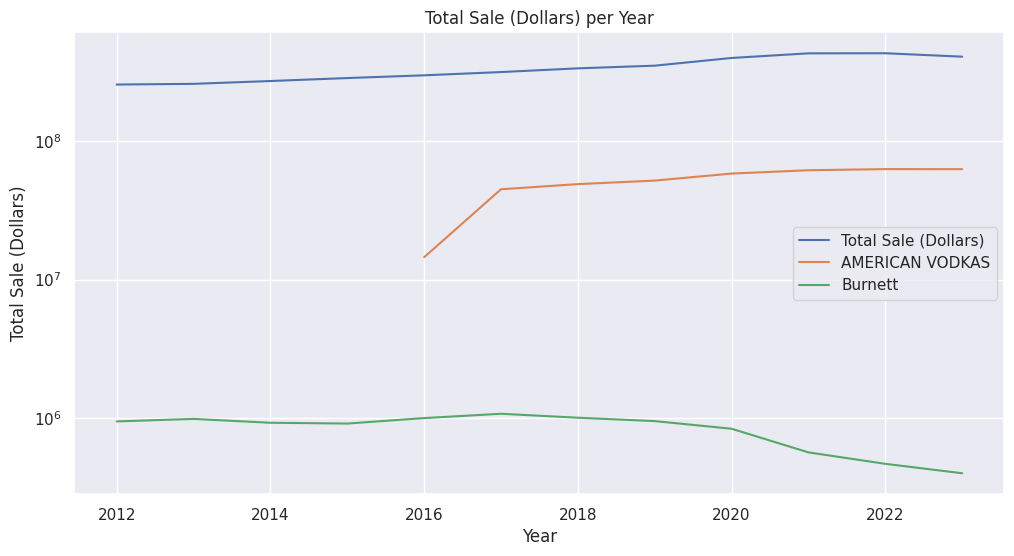

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered['Year'] = filtered['Date'].dt.year

sales_by_year = filtered.groupby('Year')['Sale (Dollars)'].sum().reset_index()

sales_by_year_category = filtered[filtered['Category Name'] == 'AMERICAN VODKAS'].groupby('Year')['Sale (Dollars)'].sum().reset_index()
sales_by_year_burnetts = filtered[filtered['Item Description'].str.contains("Burnett", case=False)].groupby('Year')['Sale (Dollars)'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.set(style="darkgrid")
sns.lineplot(x="Year", y="Sale (Dollars)", data=sales_by_year, label='Total Sale (Dollars)')
sns.lineplot(x="Year", y="Sale (Dollars)", data=sales_by_year_category, label='AMERICAN VODKAS')
sns.lineplot(x="Year", y="Sale (Dollars)", data=sales_by_year_burnetts, label="Burnett")

plt.title('Total Sale (Dollars) per Year')
plt.xlabel('Year')
plt.ylabel('Total Sale (Dollars)')

plt.yscale('log')

plt.legend()

plt.show()


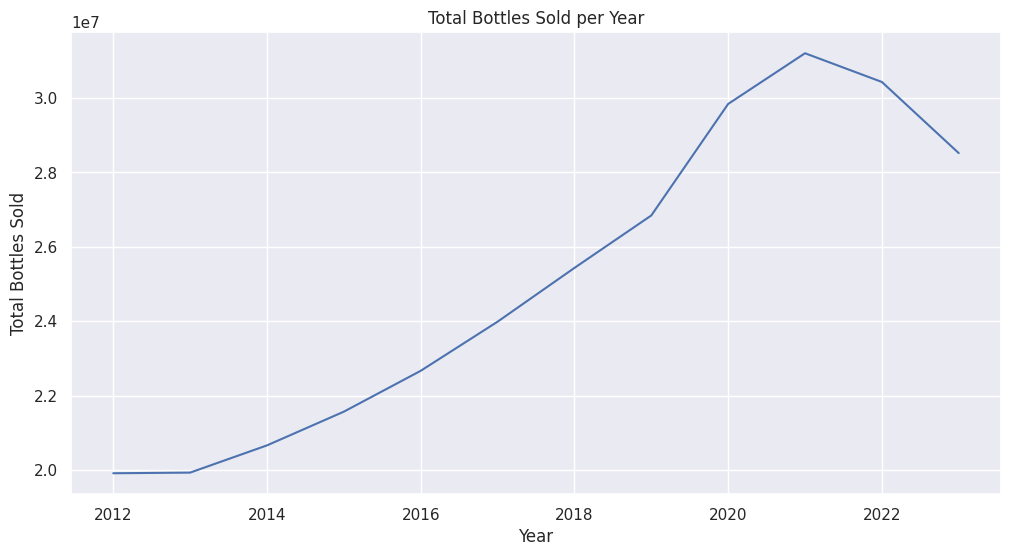

In [ ]:
# Aggregate bottles sold by year
bottles_sold_by_year = filtered.groupby('Year')['Bottles Sold'].sum().reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Use Seaborn's lineplot function to create a linear plot with "Year" on x-axis
sns.set(style="darkgrid")  # Set the style to darkgrid
sns.lineplot(x="Year", y="Bottles Sold", data=bottles_sold_by_year)

# Set the title and axis labels
plt.title('Total Bottles Sold per Year')
plt.xlabel('Year')
plt.ylabel('Total Bottles Sold')

# Display the plot
plt.show()


# Prophet

In [ ]:
data = pd.read_parquet('/content/drive/MyDrive/IE/Retail/Iowa_Liquor_Sales_2020_2023.parquet')

# Trend for all wines

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])

In [ ]:
# Create a new column 'YearMonth' to represent the year and month
data['YearMonth'] = data['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate total sales and total volume sold
monthly_summary = data.groupby('YearMonth').agg({
    'Sale (Dollars)': 'sum',
    'Volume Sold (Liters)': 'sum'
}).reset_index()

# Rename columns to reflect the aggregated data
monthly_summary.rename(columns={
    'Sale (Dollars)': 'Total Sales (Dollars)',
    'Volume Sold (Liters)': 'Total Volume Sold (Liters)'
}, inplace=True)

# Convert 'YearMonth' column back to string format for better display
monthly_summary['YearMonth'] = monthly_summary['YearMonth'].astype(str)

# Display the first few rows to check the result
print(monthly_summary.head())

# If you need to save the result to a new CSV file
# monthly_summary.to_csv('monthly_summary.csv', index=False)

  YearMonth  Total Sales (Dollars)  Total Volume Sold (Liters)
0   2020-01            24794498.26                  1566948.29
1   2020-02            25720303.90                  1630476.37
2   2020-03            31210733.11                  1956066.81
3   2020-04            31987264.68                  2036555.55
4   2020-05            32081114.18                  2068350.67


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi7lhe7pk/q22_c5em.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi7lhe7pk/bt5jqdmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50482', 'data', 'file=/tmp/tmpi7lhe7pk/q22_c5em.json', 'init=/tmp/tmpi7lhe7pk/bt5jqdmm.json', 'output', 'file=/tmp/tmpi7lhe7pk/prophet_modelxtiyak8b/prophet_model-20240608144244.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:42:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

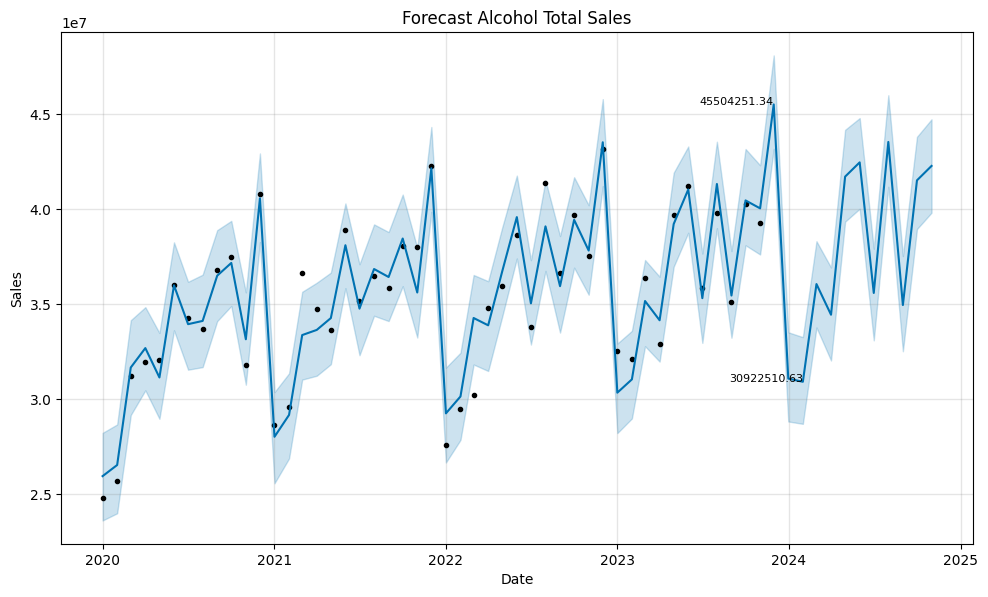

In [ ]:
S3 = monthly_summary.rename(columns={'YearMonth': 'ds', 'Total Sales (Dollars)': 'y'})

S3_model = Prophet(interval_width=0.95)
S3_model.fit(S3)

S3_forecast = S3_model.make_future_dataframe(periods=12, freq='M')

S3_forecast = S3_model.predict(S3_forecast)

plt.figure(figsize=(18,6))
forecast_plot = S3_model.plot(S3_forecast, xlabel='Date', ylabel='Sales')

forecast_values = S3_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
max_row = forecast_values.loc[forecast_values['yhat'].idxmax()]
min_row = forecast_values.loc[forecast_values['yhat'].idxmin()]

plt.text(max_row['ds'], max_row['yhat'], f"{max_row['yhat']:.2f}", color='black', fontsize=8, ha='right')
plt.text(min_row['ds'], min_row['yhat'], f"{min_row['yhat']:.2f}", color='black', fontsize=8, ha='right')

plt.title("Forecast Alcohol Total Sales")
plt.show()

In [ ]:
S3_forecast.to_parquet('/content/drive/MyDrive/IE/Retail/All_alcohol_trend.parquet')

# Trend of burnett's products

In [ ]:
# Filter rows where 'Item Description' contains 'burnett' (case insensitive)
filtered_data = data[data['Item Description'].str.contains('burnett', case=False, na=False)]

# Create a new column 'YearMonth' to represent the year and month
filtered_data['YearMonth'] = filtered_data['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate total sales and total volume sold
monthly_summary_burnett = filtered_data.groupby('YearMonth').agg({
    'Sale (Dollars)': 'sum',
    'Volume Sold (Liters)': 'sum'
}).reset_index()

# Rename columns to reflect the aggregated data
monthly_summary_burnett.rename(columns={
    'Sale (Dollars)': 'Total Sales (Dollars)',
    'Volume Sold (Liters)': 'Total Volume Sold (Liters)'
}, inplace=True)

# Convert 'YearMonth' column back to string format for better display
monthly_summary_burnett['YearMonth'] = monthly_summary_burnett['YearMonth'].astype(str)

# Display the first few rows to check the result
print(monthly_summary_burnett.head())


  YearMonth  Total Sales (Dollars)  Total Volume Sold (Liters)
0   2020-01               68702.21                     7794.35
1   2020-02               72545.52                     8220.70
2   2020-03               76625.97                     8716.55
3   2020-04               67750.11                     7712.35
4   2020-05               71203.03                     8098.20


<ipython-input-19-b9fcbcd40b43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['YearMonth'] = filtered_data['Date'].dt.to_period('M')


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi7lhe7pk/169ukekh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi7lhe7pk/2hpi19x2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76827', 'data', 'file=/tmp/tmpi7lhe7pk/169ukekh.json', 'init=/tmp/tmpi7lhe7pk/2hpi19x2.json', 'output', 'file=/tmp/tmpi7lhe7pk/prophet_modela463_bcc/prophet_model-20240608144451.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

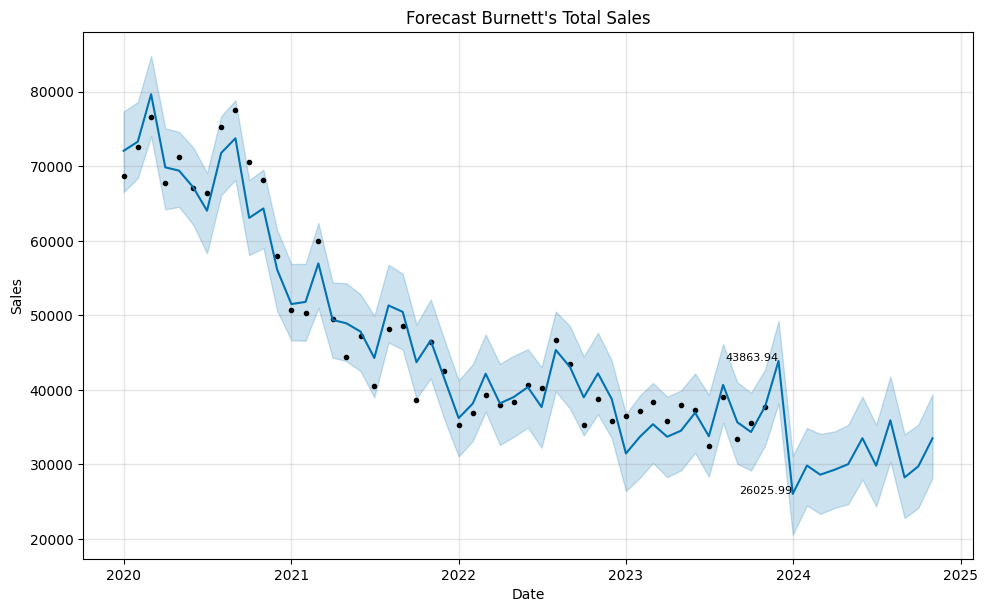

In [ ]:
S3 = monthly_summary_burnett.rename(columns={'YearMonth': 'ds', 'Total Sales (Dollars)': 'y'})

S3_model = Prophet(interval_width=0.95)
S3_model.fit(S3)

S3_forecast = S3_model.make_future_dataframe(periods=12, freq='M')

S3_forecast = S3_model.predict(S3_forecast)

plt.figure(figsize=(18,6))
forecast_plot = S3_model.plot(S3_forecast, xlabel='Date', ylabel='Sales')

forecast_values = S3_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
max_row = forecast_values.loc[forecast_values['yhat'].idxmax()]
min_row = forecast_values.loc[forecast_values['yhat'].idxmin()]

plt.text(max_row['ds'], max_row['yhat'], f"{max_row['yhat']:.2f}", color='black', fontsize=8, ha='right')
plt.text(min_row['ds'], min_row['yhat'], f"{min_row['yhat']:.2f}", color='black', fontsize=8, ha='right')

plt.title("Forecast Burnett's Total Sales")
plt.show()

In [ ]:
S3_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,78224.335398,66521.443364,77328.167751,78224.335398,78224.335398,-6169.206725,-6169.206725,-6169.206725,-6169.206725,-6169.206725,-6169.206725,0.0,0.0,0.0,72055.128674
1,2020-02-01,76473.706754,68401.481314,78600.291350,76473.706754,76473.706754,-3191.235691,-3191.235691,-3191.235691,-3191.235691,-3191.235691,-3191.235691,0.0,0.0,0.0,73282.471063
2,2020-03-01,74836.021894,74026.184079,84786.378896,74836.021894,74836.021894,4812.191030,4812.191030,4812.191030,4812.191030,4812.191030,4812.191030,0.0,0.0,0.0,79648.212925
3,2020-04-01,73085.393251,64211.564854,75083.230934,73085.393251,73085.393251,-3247.544627,-3247.544627,-3247.544627,-3247.544627,-3247.544627,-3247.544627,0.0,0.0,0.0,69837.848623
4,2020-05-01,71391.236498,64538.747596,74585.724806,71391.236498,71391.236498,-1995.435705,-1995.435705,-1995.435705,-1995.435705,-1995.435705,-1995.435705,0.0,0.0,0.0,69395.800793
5,2020-06-01,69640.607855,62117.062800,72500.765595,69640.607855,69640.607855,-2487.500652,-2487.500652,-2487.500652,-2487.500652,-2487.500652,-2487.500652,0.0,0.0,0.0,67153.107203
6,2020-07-01,67946.451102,58286.456802,69081.719471,67946.451102,67946.451102,-3929.356205,-3929.356205,-3929.356205,-3929.356205,-3929.356205,-3929.356205,0.0,0.0,0.0,64017.094898
7,2020-08-01,66195.822457,66116.499492,76727.027596,66195.822457,66195.822457,5573.770255,5573.770255,5573.770255,5573.770255,5573.770255,5573.770255,0.0,0.0,0.0,71769.592713
8,2020-09-01,64445.188152,68151.233690,78850.634802,64445.188152,64445.188152,9293.656144,9293.656144,9293.656144,9293.656144,9293.656144,9293.656144,0.0,0.0,0.0,73738.844295
9,2020-10-01,62751.025920,58057.778687,68119.920326,62751.025920,62751.025920,308.380067,308.380067,308.380067,308.380067,308.380067,308.380067,0.0,0.0,0.0,63059.405987


In [ ]:
S3_forecast.to_parquet('/content/drive/MyDrive/IE/Retail/Burnetts_All_trend.parquet')

## Categories

In [ ]:
data_cat = pd.read_csv('/content/drive/MyDrive/IE/Retail/Forecasting.csv')
data_cat = data_cat[data_cat['Category']=='Non-Flavored']

In [ ]:
data_cat['YearMonth'] = data_cat.apply(lambda row: f"{row['Year']}-{row['Month']:02d}", axis=1)

In [ ]:
data_cat

,Year,Month,Sum of Sale (Dollars),Category,YearMonth
0,2020,1,30730.02,Non-Flavored,2020-01
1,2020,2,32266.33,Non-Flavored,2020-02
2,2020,3,35299.47,Non-Flavored,2020-03
3,2020,4,35117.02,Non-Flavored,2020-04
4,2020,5,34776.13,Non-Flavored,2020-05
5,2020,6,32992.12,Non-Flavored,2020-06
6,2020,7,30952.90,Non-Flavored,2020-07
7,2020,8,32884.28,Non-Flavored,2020-08
8,2020,9,31186.46,Non-Flavored,2020-09
9,2020,10,28701.23,Non-Flavored,2020-10


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi7lhe7pk/2_459_51.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi7lhe7pk/8feuns2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56666', 'data', 'file=/tmp/tmpi7lhe7pk/2_459_51.json', 'init=/tmp/tmpi7lhe7pk/8feuns2m.json', 'output', 'file=/tmp/tmpi7lhe7pk/prophet_model7e0uq0t3/prophet_model-20240608144558.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

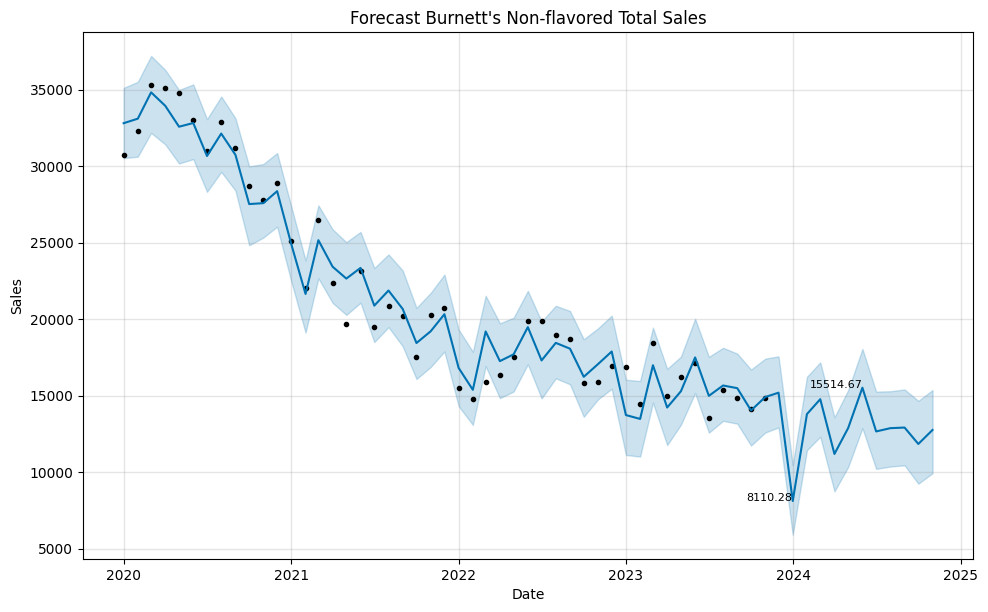

In [ ]:
S3 = data_cat.rename(columns={'YearMonth': 'ds', 'Sum of Sale (Dollars)': 'y'})

S3_model = Prophet(interval_width=0.95)
S3_model.fit(S3)

S3_forecast = S3_model.make_future_dataframe(periods=12, freq='M')

S3_forecast = S3_model.predict(S3_forecast)

plt.figure(figsize=(18,6))
forecast_plot = S3_model.plot(S3_forecast, xlabel='Date', ylabel='Sales')

forecast_values = S3_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
max_row = forecast_values.loc[forecast_values['yhat'].idxmax()]
min_row = forecast_values.loc[forecast_values['yhat'].idxmin()]

plt.text(max_row['ds'], max_row['yhat'], f"{max_row['yhat']:.2f}", color='black', fontsize=8, ha='right')
plt.text(min_row['ds'], min_row['yhat'], f"{min_row['yhat']:.2f}", color='black', fontsize=8, ha='right')

plt.title("Forecast Burnett's Non-flavored Total Sales")
plt.show()

In [ ]:
S3_forecast.to_parquet('/content/drive/MyDrive/IE/Retail/Non_flavored_trend.parquet')

# Forecast Flavored

In [ ]:
data_cat = pd.read_csv('/content/drive/MyDrive/IE/Retail/Forecasting.csv')
data_cat = data_cat[data_cat['Category']=='Flavored']
data_cat['YearMonth'] = data_cat.apply(lambda row: f"{row['Year']}-{row['Month']:02d}", axis=1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi7lhe7pk/z7694kvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi7lhe7pk/gf_lzuwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74892', 'data', 'file=/tmp/tmpi7lhe7pk/z7694kvt.json', 'init=/tmp/tmpi7lhe7pk/gf_lzuwp.json', 'output', 'file=/tmp/tmpi7lhe7pk/prophet_modelh3j07ad_/prophet_model-20240608144619.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:46:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

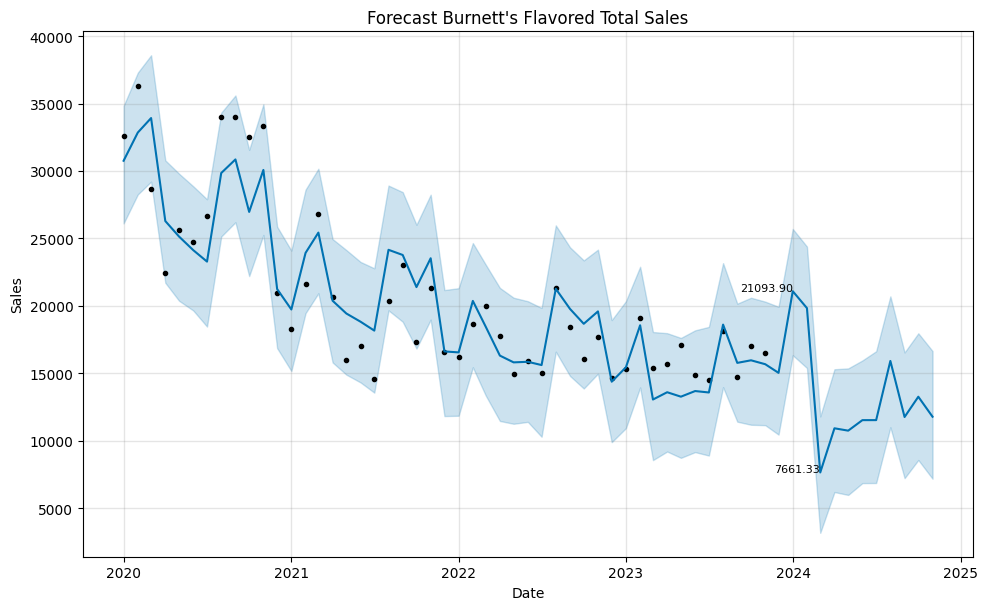

In [ ]:
S3 = data_cat.rename(columns={'YearMonth': 'ds', 'Sum of Sale (Dollars)': 'y'})

S3_model = Prophet(interval_width=0.95)
S3_model.fit(S3)

S3_forecast = S3_model.make_future_dataframe(periods=12, freq='M')

S3_forecast = S3_model.predict(S3_forecast)

plt.figure(figsize=(18,6))
forecast_plot = S3_model.plot(S3_forecast, xlabel='Date', ylabel='Sales')

forecast_values = S3_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
max_row = forecast_values.loc[forecast_values['yhat'].idxmax()]
min_row = forecast_values.loc[forecast_values['yhat'].idxmin()]

plt.text(max_row['ds'], max_row['yhat'], f"{max_row['yhat']:.2f}", color='black', fontsize=8, ha='right')
plt.text(min_row['ds'], min_row['yhat'], f"{min_row['yhat']:.2f}", color='black', fontsize=8, ha='right')

plt.title("Forecast Burnett's Flavored Total Sales")
plt.show()

In [ ]:
S3_forecast.to_parquet('/content/drive/MyDrive/IE/Retail/Flavored_trend.parquet')

# Tier analysing

In [ ]:
import pandas as pd
import zipfile

# 定义ZIP文件路径
zip_file_path = '/content/drive/MyDrive/IE/Retail/Iowa_Liquor_Sales_DEC2023.csv.zip'
csv_file_name = 'Iowa_Liquor_Sales_DEC2023.csv'

# 使用zipfile模块读取指定的CSV文件
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # 打印ZIP文件中的文件列表
    print("Files in ZIP:", z.namelist())

    # 读取指定的CSV文件
    with z.open(csv_file_name) as f:
        data = pd.read_csv(f)
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for the year 2023
data = data[data['Date'].dt.year == 2023]

Files in ZIP: ['Iowa_Liquor_Sales_DEC2023.csv', '__MACOSX/._Iowa_Liquor_Sales_DEC2023.csv']


<ipython-input-3-9752748ad8dd>:15: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f)


## AMERICAN VODKAS 650-850ml

In [ ]:
# 1. Filter data where 'Category Name' is 'AMERICAN VODKAS' and 'Bottle Volume' is between 650 and 850
filtered_data = data[(data['Category Name'] == 'AMERICAN VODKAS') &
                     (data['Bottle Volume (ml)'] >= 650) &
                     (data['Bottle Volume (ml)'] <= 850)]

# 2. Calculate the average 'State Bottle Retail' and the total 'Sale (Dollars)' and 'Bottles Sold' for each product
# Also, keep 'Item Number', 'Vendor Name', 'Category Name', 'Bottle Volume (ml)', and 'Pack' without aggregation
average_retail_prices = filtered_data.groupby(['Item Number', 'Vendor Name', 'Category Name', 'Bottle Volume (ml)', 'Pack']).agg(
    average_retail_price=('State Bottle Retail', 'mean'),
    total_sales=('Sale (Dollars)', 'sum'),
    total_bottles_sold=('Bottles Sold', 'sum')
).reset_index()

# 3. Sort by the average 'State Bottle Retail' in descending order
average_retail_prices = average_retail_prices.sort_values(by='average_retail_price', ascending=False).reset_index(drop=True)

# 4. Divide the products into 4 tiers based on the average price
number_of_tiers = 4
if len(average_retail_prices) >= number_of_tiers:
    average_retail_prices['Tier'] = pd.qcut(average_retail_prices['average_retail_price'], q=number_of_tiers, labels=['Level 4', 'Level 3', 'Level 2', 'Level 1'])

# Output the final dataframe
average_retail_prices

,Item Number,Vendor Name,Category Name,Bottle Volume (ml),Pack,average_retail_price,total_sales,total_bottles_sold,Tier
0,935863,SAZERAC COMPANY INC,AMERICAN VODKAS,750,1,233.990000,3041.87,13,Level 1
1,936975,MEISENBURG BREWING & DISTILLING,AMERICAN VODKAS,750,6,30.000000,180.00,6,Level 1
2,935740,BENDISTILLERY,AMERICAN VODKAS,750,6,29.630000,355.56,12,Level 1
3,936261,WINESOURCE INTERNATIONAL INC.,AMERICAN VODKAS,750,12,27.000000,972.00,36,Level 1
4,972676,BRECKENRIDGE DISTILLERY / DOUBLE DIAMOND DISTI...,AMERICAN VODKAS,750,6,26.250000,157.50,6,Level 1
...,...,...,...,...,...,...,...,...,...
101,35315,SAZERAC COMPANY INC,AMERICAN VODKAS,750,12,5.060000,77498.96,15316,Level 4
102,36648,SAZERAC COMPANY INC,AMERICAN VODKAS,750,12,4.970937,84554.61,17013,Level 4
103,36976,SAZERAC COMPANY INC,AMERICAN VODKAS,750,12,4.950000,66448.80,13424,Level 4
104,35946,SAZERAC COMPANY INC,AMERICAN VODKAS,750,12,4.500000,40626.00,9028,Level 4


In [ ]:
average_retail_prices[average_retail_prices['Item Number']==35416]

,Item Number,Vendor Name,Category Name,Bottle Volume (ml),Pack,average_retail_price,total_sales,total_bottles_sold,Tier
88,35416,HEAVEN HILL BRANDS,AMERICAN VODKAS,750,12,6.75,57861.0,8572,Level 4


In [ ]:
AMERICAN_VODKAS_750=average_retail_prices
BURNETTS_VODKA_80PRF_level4=average_retail_prices[(average_retail_prices['Tier']=='Level 4')].sort_values(by='total_sales',ascending=False)

In [ ]:
AMERICAN_VODKAS_750.to_csv('/content/drive/MyDrive/IE/Retail/American_Vodkas_750.csv')
BURNETTS_VODKA_80PRF_level4.to_csv('/content/drive/MyDrive/IE/Retail/BURNETTS_VODKA_80PRF_750ml_tier.csv')

## American Vodka 1750ml

In [ ]:
# 1. Filter data where 'Category Name' is 'AMERICAN VODKAS' and 'Bottle Volume' is between 650 and 850
filtered_data = data[(data['Category Name'] == 'AMERICAN VODKAS') &
                     (data['Bottle Volume (ml)'] >= 1650) &
                     (data['Bottle Volume (ml)'] <= 1850)]

# 2. Calculate the average 'State Bottle Retail' and the total 'Sale (Dollars)' and 'Bottles Sold' for each product
# Also, keep 'Item Number', 'Vendor Name', 'Category Name', 'Bottle Volume (ml)', and 'Pack' without aggregation
average_retail_prices = filtered_data.groupby(['Item Number', 'Vendor Name', 'Category Name', 'Bottle Volume (ml)', 'Pack']).agg(
    average_retail_price=('State Bottle Retail', 'mean'),
    total_sales=('Sale (Dollars)', 'sum'),
    total_bottles_sold=('Bottles Sold', 'sum')
).reset_index()

# 3. Sort by the average 'State Bottle Retail' in descending order
average_retail_prices = average_retail_prices.sort_values(by='average_retail_price', ascending=False).reset_index(drop=True)

# 4. Divide the products into 4 tiers based on the average price
number_of_tiers = 4
if len(average_retail_prices) >= number_of_tiers:
    average_retail_prices['Tier'] = pd.qcut(average_retail_prices['average_retail_price'], q=number_of_tiers, labels=['Level 4', 'Level 3', 'Level 2', 'Level 1'])

# Output the final dataframe
average_retail_prices.head()

,Item Number,Vendor Name,Category Name,Bottle Volume (ml),Pack,average_retail_price,total_sales,total_bottles_sold,Tier
0,38519,SAZERAC COMPANY INC,AMERICAN VODKAS,1750,6,28.500000,18724.50,657,Level 1
1,38178,FIFTH GENERATION INC,AMERICAN VODKAS,1750,6,28.500000,10906266.00,382676,Level 1
2,38135,TENN SOUTH DISTILLERY / BIG MACHINE DISTILLERY,AMERICAN VODKAS,1750,6,28.500000,1111.50,39,Level 1
3,35358,21ST CENTURY SPIRITS LLC,AMERICAN VODKAS,1750,6,26.066154,2116.40,81,Level 1
4,39868,DIAGEO AMERICAS,AMERICAN VODKAS,1750,6,25.490000,37801.67,1483,Level 1


In [ ]:
average_retail_prices.loc[average_retail_prices['Item Number']==35418,'Tier']

20    Level 3
Name: Tier, dtype: category
Categories (4, object): ['Level 4' < 'Level 3' < 'Level 2' < 'Level 1']

In [ ]:
AMERICAN_VODKAS_1750=average_retail_prices
BURNETTS_VODKA_80PRF_1750ml_level4=average_retail_prices[average_retail_prices['Tier']=='Level 3'].sort_values(by='total_sales',ascending=False)

In [ ]:
AMERICAN_VODKAS_1750.to_csv('/content/drive/MyDrive/IE/Retail/American_Vodkas_1750.csv')
BURNETTS_VODKA_80PRF_1750ml_level4.to_csv('/content/drive/MyDrive/IE/Retail/BURNETTS_VODKA_80PRF_1750ml_tier.csv')

## Blue Raspberry

In [ ]:
# 1. Filter data where 'Category Name' is 'AMERICAN VODKAS' and 'Bottle Volume' is between 650 and 850
filtered_data = data[(data['Category Name'] == 'AMERICAN FLAVORED VODKA') &
                     (data['Bottle Volume (ml)'] >= 650) &
                     (data['Bottle Volume (ml)'] <= 850)]

# 2. Calculate the average 'State Bottle Retail' and the total 'Sale (Dollars)' and 'Bottles Sold' for each product
# Also, keep 'Item Number', 'Vendor Name', 'Category Name', 'Bottle Volume (ml)', and 'Pack' without aggregation
average_retail_prices = filtered_data.groupby(['Item Number', 'Vendor Name', 'Category Name', 'Bottle Volume (ml)', 'Pack']).agg(
    average_retail_price=('State Bottle Retail', 'mean'),
    total_sales=('Sale (Dollars)', 'sum'),
    total_bottles_sold=('Bottles Sold', 'sum')
).reset_index()

# 3. Sort by the average 'State Bottle Retail' in descending order
average_retail_prices = average_retail_prices.sort_values(by='average_retail_price', ascending=False).reset_index(drop=True)

# 4. Divide the products into 4 tiers based on the average price
number_of_tiers = 4
if len(average_retail_prices) >= number_of_tiers:
    average_retail_prices['Tier'] = pd.qcut(average_retail_prices['average_retail_price'], q=number_of_tiers, labels=['Level 4', 'Level 3', 'Level 2', 'Level 1'])

# Output the final dataframe
average_retail_prices.head()

,Item Number,Vendor Name,Category Name,Bottle Volume (ml),Pack,average_retail_price,total_sales,total_bottles_sold,Tier
0,987156,NORTH SHORE DISTILLERY,AMERICAN FLAVORED VODKA,750,6,32.510,195.06,6,Level 1
1,39026,COPPER STILL DISTILLERY,AMERICAN FLAVORED VODKA,750,12,30.000,1530.00,51,Level 1
2,77189,SODA JERK LLC,AMERICAN FLAVORED VODKA,750,6,30.000,11760.00,392,Level 1
3,77203,SODA JERK LLC,AMERICAN FLAVORED VODKA,750,6,30.000,21180.00,706,Level 1
4,37502,PARK STREET IMPORTS,AMERICAN FLAVORED VODKA,750,6,26.277,957.24,33,Level 1


In [ ]:
average_retail_prices[average_retail_prices['Item Number']==41670]

,Item Number,Vendor Name,Category Name,Bottle Volume (ml),Pack,average_retail_price,total_sales,total_bottles_sold,Tier
150,41670,HEAVEN HILL BRANDS,AMERICAN FLAVORED VODKA,750,12,6.75,27270.0,4040,Level 4


In [ ]:
AMERICAN_FLAVOURED_VODKAS_750=average_retail_prices
BURNETTS_FLAVOURED_750ml=average_retail_prices[(average_retail_prices['Tier']=='Level 4')].sort_values(by='total_sales',ascending=False)

In [ ]:
AMERICAN_FLAVOURED_VODKAS_750.to_csv('/content/drive/MyDrive/IE/Retail/AMERICAN_FLAVOURED_VODKAS_750.csv')
BURNETTS_FLAVOURED_750ml.to_csv('/content/drive/MyDrive/IE/Retail/BURNETTS_FLAVOURED_750ml_tier.csv')